In [3]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

plt.style.use('seaborn-ticks')
%matplotlib inline

In [8]:
dane = pd.read_excel("default of credit card clients.xls")
print(dane.shape)
dane.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,yes
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,no


In [9]:
# usuniecie zmiennej porzadkowej ID
dane = dane.drop(columns=['ID'])

In [10]:
dane.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
#zmiana nazw kolumn
dane.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default']

In [12]:
dane.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,yes
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,no


In [13]:
objasniana = "default"

In [14]:
objasniajace_numeryczne = ['LIMIT_BAL', 'AGE',
                           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                           'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [15]:
objasniajace_kategoryczne = ['SEX', 'EDUCATION', 'MARRIAGE', 
                             'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [16]:
# One hot encoding

# zmienne kategoryczne tekstowe
zmienne_rozkodowane1 = pd.get_dummies(dane[objasniajace_kategoryczne[1:3]], drop_first=True)

# zmienne kategoryczne numeryczne
zmienne_rozkodowane2 = pd.get_dummies(dane[objasniajace_kategoryczne[3:9]].astype(str), drop_first=True)

# Połączenie zmiennych numerycznych, kategorycznych w postaci on hot encoding oraz targetu
dane = pd.concat([dane[objasniajace_numeryczne], zmienne_rozkodowane1, zmienne_rozkodowane2, dane[[objasniana]]], axis=1)

dane.shape

(30000, 80)

In [17]:
# nowe kolumny
dane.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_highschool',
       'EDUCATION_other', 'EDUCATION_university', 'EDUCATION_unknown',
       'MARRIAGE_others', 'MARRIAGE_single', 'MARRIAGE_unknown', 'PAY_0_-2',
       'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5',
       'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
       'PAY_6_-2', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3

In [18]:
# wyświetlam liczbę obserwacji 0 / 1 dla zmiennej default

dane[objasniana].value_counts()

no     23364
yes     6636
Name: default, dtype: int64

In [19]:
# standaryzuję zmienne numeryczne

dane[objasniajace_numeryczne] = dane[objasniajace_numeryczne].apply(lambda x: (x-x.mean())/x.std())

In [20]:
# robię liste zmiennych objaśniających

lista_zmiennych = dane.columns.tolist()
lista_zmiennych.remove(objasniana)
print(lista_zmiennych)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_highschool', 'EDUCATION_other', 'EDUCATION_university', 'EDUCATION_unknown', 'MARRIAGE_others', 'MARRIAGE_single', 'MARRIAGE_unknown', 'PAY_0_-2', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8']


# Pierwszy model

In [21]:
# Wczytanie potrzebnych bibliotek
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import roc_auc_score

# Przygotujmy wrapper
def walidacja_krzyzowa_knn_1(foldy = 5, poziom = 2020, debug = False, *args, **kwargs):
    kf = KFold(n_splits = foldy, shuffle = True, random_state = poziom)

    # Listy z wynikami
    wyniki_testowe = []
    wyniki_treningowe = []
    predykcje = []
    indeksy = []
    
    # Pętla walidująca model na kolejnych foldach
    for train, test in kf.split(dane.index.values):
        # Przygotowanie estymatora
        clf = neighbors.KNeighborsClassifier(*args, **kwargs)
        if debug:
            print(clf)
        # Trenowanie modelu
        clf.fit(dane.iloc[train][lista_zmiennych], dane.iloc[train][objasniana])

        # Przygotowanie prognoz dla zbioru treningowego i testowego
        # UWAGA Sklearn zwracał będzie dwie kolumny prawdopodobieństw dla obydwu klas
        predykcje_treningowe = clf.predict_proba(dane.iloc[train][lista_zmiennych])[:,1]
        predykcje_testowe = clf.predict_proba(dane.iloc[test][lista_zmiennych])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predykcje.append(predykcje_testowe.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indeksy.append(dane.iloc[test].index.tolist().copy())
        
        # Policzenie ROC-AUC dla foldów
        oszacowania_treningowe = roc_auc_score((dane[objasniana].iloc[train]=="yes").astype(int), predykcje_treningowe)
        oszacowania_testowe = roc_auc_score((dane[objasniana].iloc[test]=="yes").astype(int), predykcje_testowe)
        
        # Zapisanie wyników dla foldów
        wyniki_treningowe.append(oszacowania_treningowe)
        wyniki_testowe.append(oszacowania_testowe)
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        if debug:
            print("Train AUC:", oszacowania_treningowe,
                  "Valid AUC:", oszacowania_testowe)
        
    return wyniki_treningowe, wyniki_testowe, predykcje, indeksy

In [18]:
# dla 50 sąsiadów, dystansu minkowskiego p=2 czyli z dystansem eklidesowym

wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_1(n_neighbors=50, n_jobs=-1, p=2, debug=True)

print(np.mean(wyniki_testowe))

KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Train AUC: 0.7869959994857808 Valid AUC: 0.7559663493644075
KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Train AUC: 0.78744887038388 Valid AUC: 0.7499074486861623
KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Train AUC: 0.7862088561802176 Valid AUC: 0.7549907458321836
KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Train AUC: 0.7874233376223996 Valid AUC: 0.7438427674717139
KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Train AUC: 0.7855407767019799 Valid AUC: 0.7538032121103742
0.7517021046929683


# Poszukiwania odpowiedniej liczby sąsiadów poprzez walidację krzyżową: parametr k

In [141]:
# Ta pętla przechodzi po wartościach k i dla każdej wykonuje walidację krzyżową.
for k in [1, 3, 5, 10, 15, 30, 50, 100, 150, 200]:
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_1(n_neighbors=k, n_jobs=-1, p=2)
    print(k, np.mean(wyniki_treningowe), np.mean(wyniki_testowe))

1 0.9987428053532031 0.6120794477726561
3 0.9186458037019788 0.6759369542707321
5 0.8817942054675454 0.6983381418026584
10 0.840006136219114 0.7208113640374555
15 0.8217892028026373 0.7328535868287244
30 0.7975686101020749 0.7445753179461664
50 0.7867235680748516 0.7517021046929683
100 0.7750316232851506 0.7548423790405867
150 0.7701467800777845 0.755218286686482
200 0.7666103556008054 0.7547691070538021


Jak widać, najlepsze wyniki uzyskujemy dla 100, 150 i 200 sąsiadów obserwacji. Powtarzamy pętle dla wartości w tej okolicy z dokładniejszym podziałem.

In [143]:
for k in [100, 125, 150, 175, 200, 225, 250, 200]:
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_1(n_neighbors=k, n_jobs=-1, p=2)
    print(k, np.mean(wyniki_treningowe), np.mean(wyniki_testowe))

100 0.7750316232851506 0.7548423790405867
125 0.7718196948736274 0.7548526099876737
150 0.7701467800777845 0.755218286686482
175 0.7682361267583222 0.7551147743469537
200 0.7666103556008054 0.7547691070538021
225 0.7655433513670864 0.7548640132955974
250 0.7644904819203512 0.7548004414475251
200 0.7666103556008054 0.7547691070538021


Wyniki są mocno do siebie zbliżone, ale można powiedzieć, że najlepsze dla 150 lub 175 sąsiadów obserwacji.

# Poszukiwanie właściwej miary dystansu: parametr p

W pierwszej kolejności sprawdzamy, jak wyniki zmienią się dla p=1, czyli dla miary dystansu Manhattan. Sprawdzamy wyniki otrzymane przy zastosowaniu innej miary dystansu dla liczby sąsiadów wokoło 150, gdyby okazało się, że lekko zmiena się optymalna liczba sąsiadów przyzastosowaniu nowej miary dystanu.

In [21]:
for k in [100, 125, 150, 175, 200, 225, 250, 200]:
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_1(n_neighbors=k, n_jobs=-1, p=1)
    print(k, np.mean(wyniki_testowe))

100 0.7620529272779956
125 0.7623118699197402
150 0.7620784846193273
175 0.7610728852803449
200 0.7608474247872552
225 0.7607204009481541
250 0.7601966307368101
200 0.7608474247872552


Wyniki nie poprawiły się znacznie, ale subtelną poprawę widać. Póki co najlepsze wyniki otrzymujemy dla 125 sąsiadów i zastosowania paprametru p=1 czyli dla miary odległości Manhattan. 

# Wybór zmiennych objaśniających: feature engineering

In [22]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import roc_auc_score

features = []

# Przygotujmy wrapper
def walidacja_krzyzowa_knn_2(foldy = 5, poziom=2020, debug=False, features=features, *args, **kwargs):
    kf = KFold(n_splits=foldy, shuffle=True, random_state=poziom)

    # Listy z wynikami
    wyniki_testowe = []
    wyniki_treningowe = []
    predykcje = []
    indeksy = []
    
    for train, test in kf.split(dane.index.values):
        # Przygotowanie estymatora
        clf = neighbors.KNeighborsClassifier(*args, **kwargs)
        if debug:
            print(clf)
        # Trenowanie modelu
        clf.fit(dane.iloc[train][features], dane.iloc[train][objasniana])

        # Przygotowanie prognoz dla zbioru traeningowego i testowego
        # UWAGA Sklearn zwracałbędzie dwie kolumny prawdopodobieństw dla obydwu klas
        predykcje_treningowe = clf.predict_proba(dane.iloc[train][features])[:,1]
        predykcje_testowe = clf.predict_proba(dane.iloc[test][features])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predykcje.append(predykcje_testowe.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indeksy.append(dane.iloc[test].index.tolist().copy())
        
        # Policzenie ROC-AUC dla foldów
        oszacowania_treningowe = roc_auc_score((dane[objasniana].iloc[train]=="yes").astype(int), predykcje_treningowe)
        oszacowania_testowe = roc_auc_score((dane[objasniana].iloc[test]=="yes").astype(int), predykcje_testowe)
        
        # Zapisanie wyników dla foldów
        wyniki_treningowe.append(oszacowania_treningowe)
        wyniki_testowe.append(oszacowania_testowe)
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        if debug:
            print("Train AUC:", oszacowania_treningowe,
                  "Valid AUC:", oszacowania_testowe)
        
    return wyniki_treningowe, wyniki_testowe, predykcje, indeksy

Na początku sprawdzamy, jakie wyniki otrzymamy dla modeli z każdą zmienną osobno Modele wykonujemy z parametrami p=1 i liczbą sąsiadów równą 125, ponieważ dla tych wartości póki co otrzymaliśm najlepsze wyniki dla modeli z pełną lista zmiennych z bazy.

In [40]:
wyniki = []
for zmienna in lista_zmiennych:
    # Estymacja pojedynczych modeli
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=[zmienna])
    print(zmienna, np.mean(wyniki_testowe))
    # Zapisanie wyniku
    wyniki.append((zmienna, np.mean(wyniki_testowe)))

LIMIT_BAL 0.6086940358973363
AGE 0.5254667456786359
BILL_AMT1 0.530976598360603
BILL_AMT2 0.5281944427520467
BILL_AMT3 0.5264448335196605
BILL_AMT4 0.5315010027711262
BILL_AMT5 0.5327150571036589
BILL_AMT6 0.5351853386761828
PAY_AMT1 0.6169742439063269
PAY_AMT2 0.6006513032270908
PAY_AMT3 0.5985242461964594
PAY_AMT4 0.5832910506613664
PAY_AMT5 0.5702583792493667
PAY_AMT6 0.5763946321519969
EDUCATION_highschool 0.49333236444701356
EDUCATION_other 0.501954931937278
EDUCATION_university 0.5219718964727937
EDUCATION_unknown 0.5048659796003411
MARRIAGE_others 0.4987464349797757
MARRIAGE_single 0.5185152346665903
MARRIAGE_unknown 0.5006730105591176
PAY_0_-2 0.5237621530973584
PAY_0_0 0.6327031849121786
PAY_0_1 0.5421130952574654
PAY_0_2 0.6213718891859071
PAY_0_3 0.5167126816483335
PAY_0_4 0.5034169592369899
PAY_0_5 0.5006542771430296
PAY_0_6 0.4996691015938854
PAY_0_7 0.5002186589319256
PAY_0_8 0.5006285465049675
PAY_2_-2 0.5089272604697458
PAY_2_0 0.5943691486384807
PAY_2_1 0.5001114174387

Sortujemy wyniki malejąco, żeby spradzić, dla których zmiennych zastosowanych pojedynczo w modelu ma on najelpsze rezutaty.

In [41]:
wyniki = sorted(wyniki, key=lambda x: x[1], reverse=True)
wyniki

[('PAY_0_0', 0.6327031849121786),
 ('PAY_2_2', 0.6272339645862515),
 ('PAY_0_2', 0.6213718891859071),
 ('PAY_AMT1', 0.6169742439063269),
 ('LIMIT_BAL', 0.6086940358973363),
 ('PAY_3_2', 0.6086803260075453),
 ('PAY_AMT2', 0.6006513032270908),
 ('PAY_AMT3', 0.5985242461964594),
 ('PAY_2_0', 0.5943691486384807),
 ('PAY_4_2', 0.5922035953698541),
 ('PAY_AMT4', 0.5832910506613664),
 ('PAY_5_2', 0.5813815840176018),
 ('PAY_AMT6', 0.5763946321519969),
 ('PAY_6_2', 0.5762165367995825),
 ('PAY_3_0', 0.5711348774016439),
 ('PAY_AMT5', 0.5702583792493667),
 ('PAY_4_0', 0.5602745367429106),
 ('PAY_5_0', 0.5534968433503795),
 ('PAY_6_0', 0.5515075240882459),
 ('PAY_0_1', 0.5421130952574654),
 ('BILL_AMT6', 0.5351853386761828),
 ('BILL_AMT5', 0.5327150571036589),
 ('BILL_AMT4', 0.5315010027711262),
 ('BILL_AMT1', 0.530976598360603),
 ('BILL_AMT2', 0.5281944427520467),
 ('BILL_AMT3', 0.5264448335196605),
 ('AGE', 0.5254667456786359),
 ('PAY_0_-2', 0.5237621530973584),
 ('EDUCATION_university', 0.5219

Aby sprawdzić, jakie wyniki otrzymujemy dla modeli ze zmiennymi, dla których pojedyncze modele osiągały najlepsze rezultaty, liczymy model dla 125 najbliższych sąsiadów i mierze odległości Manhattan ze zmiennymi o wynikach większych niż 51%

In [49]:
zmienne51 = [x for x,y in wyniki if y > 0.51]
print(zmienne51)

['PAY_0_0', 'PAY_2_2', 'PAY_0_2', 'PAY_AMT1', 'LIMIT_BAL', 'PAY_3_2', 'PAY_AMT2', 'PAY_AMT3', 'PAY_2_0', 'PAY_4_2', 'PAY_AMT4', 'PAY_5_2', 'PAY_AMT6', 'PAY_6_2', 'PAY_3_0', 'PAY_AMT5', 'PAY_4_0', 'PAY_5_0', 'PAY_6_0', 'PAY_0_1', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'AGE', 'PAY_0_-2', 'EDUCATION_university', 'MARRIAGE_single', 'PAY_0_3', 'PAY_3_-2', 'PAY_2_3', 'PAY_4_-2']


In [50]:
wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne51)
print(np.mean(wyniki_testowe))

0.7648307519217752


Wynik poprawił się z 76,23% do 76,48%. Jako że jest to niewielka zmiana, sprawdzamy, jak będzie wyglądał model dla zmiennych o wynikach powyżej 50% w modelach z jedną zmienną.

In [52]:
zmienne50 = [x for x,y in wyniki if y > 0.50]
print(zmienne50)

['PAY_0_0', 'PAY_2_2', 'PAY_0_2', 'PAY_AMT1', 'LIMIT_BAL', 'PAY_3_2', 'PAY_AMT2', 'PAY_AMT3', 'PAY_2_0', 'PAY_4_2', 'PAY_AMT4', 'PAY_5_2', 'PAY_AMT6', 'PAY_6_2', 'PAY_3_0', 'PAY_AMT5', 'PAY_4_0', 'PAY_5_0', 'PAY_6_0', 'PAY_0_1', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'AGE', 'PAY_0_-2', 'EDUCATION_university', 'MARRIAGE_single', 'PAY_0_3', 'PAY_3_-2', 'PAY_2_3', 'PAY_4_-2', 'PAY_2_-2', 'PAY_3_3', 'PAY_6_3', 'PAY_5_3', 'PAY_4_3', 'EDUCATION_unknown', 'PAY_0_4', 'PAY_5_7', 'PAY_4_7', 'PAY_5_4', 'PAY_4_4', 'PAY_2_4', 'PAY_6_7', 'PAY_3_4', 'PAY_6_4', 'EDUCATION_other', 'PAY_3_7', 'PAY_4_5', 'PAY_6_6', 'PAY_3_6', 'PAY_2_7', 'MARRIAGE_unknown', 'PAY_0_5', 'PAY_0_8', 'PAY_2_5', 'PAY_3_5', 'PAY_0_7', 'PAY_2_6', 'PAY_3_1', 'PAY_2_1', 'PAY_4_1', 'PAY_3_8']


In [53]:
wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne50)
print(np.mean(wyniki_testowe))

0.7638140815776087


Ponieważ włączenie większej liczby zmiennych nawet nieznacznie pogorszyło wyniki, spróbujemy przeprowadzić modele na jeszcze mocniej  ograniczonej liście zmienych niż uprzednio. Wybieramy zmienne, które w pojedynczych modelach osiągały więcej niż 52% i 53%.

In [54]:
zmienne52 = [x for x,y in wyniki if y > 0.52]
print(zmienne52)

['PAY_0_0', 'PAY_2_2', 'PAY_0_2', 'PAY_AMT1', 'LIMIT_BAL', 'PAY_3_2', 'PAY_AMT2', 'PAY_AMT3', 'PAY_2_0', 'PAY_4_2', 'PAY_AMT4', 'PAY_5_2', 'PAY_AMT6', 'PAY_6_2', 'PAY_3_0', 'PAY_AMT5', 'PAY_4_0', 'PAY_5_0', 'PAY_6_0', 'PAY_0_1', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'AGE', 'PAY_0_-2', 'EDUCATION_university']


In [55]:
wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne52)
print(np.mean(wyniki_testowe))

0.7627063693292552


In [31]:
#zmienne53 = [x for x,y in wyniki if y > 0.53]
#print(zmienne53)

# odtwarzam listę z wyników, żeby nie powtarzać obliczeń

zmienne53 = ['PAY_0_0', 'PAY_2_2', 'PAY_0_2', 'PAY_AMT1', 'LIMIT_BAL', 'PAY_3_2', 'PAY_AMT2', 'PAY_AMT3', 'PAY_2_0', 'PAY_4_2', 'PAY_AMT4', 'PAY_5_2', 'PAY_AMT6', 'PAY_6_2', 'PAY_3_0', 'PAY_AMT5', 'PAY_4_0', 'PAY_5_0', 'PAY_6_0', 'PAY_0_1', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT1']

In [57]:
wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne53)
print(np.mean(wyniki_testowe))

0.7687148541414468


In [58]:
zmienne54 = [x for x,y in wyniki if y > 0.54]
print(zmienne54)

['PAY_0_0', 'PAY_2_2', 'PAY_0_2', 'PAY_AMT1', 'LIMIT_BAL', 'PAY_3_2', 'PAY_AMT2', 'PAY_AMT3', 'PAY_2_0', 'PAY_4_2', 'PAY_AMT4', 'PAY_5_2', 'PAY_AMT6', 'PAY_6_2', 'PAY_3_0', 'PAY_AMT5', 'PAY_4_0', 'PAY_5_0', 'PAY_6_0', 'PAY_0_1']


In [59]:
wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne54)
print(np.mean(wyniki_testowe))

0.7672332738032915


Dla zmiennych o wynikach powyżej 53% uzyskaliśmy póki co najlepsze wyniki (dalsze podnoszneie progu do 54% już nie przyniosło poprawy), więc decydujemy się na pozostawienie takiego zbioru zmiennych

# Wybór metody skalowania: feature generation

Wpier na wszelki wypadek kopiujemy analzowany zbiór danych, ponieważ zaraz będziemy spradzać, jak zwiększenie oddziaływania poszczególnych zmiennych wpłynie na osiągane przez model wyniki.

In [23]:
kopia_zbioru = dane.copy()

In [24]:
kopia_zbioru.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default
0,-1.136701,-1.245999,-0.642490,-0.647388,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,...,1,0,0,0,0,0,0,0,0,yes
1,-0.365974,-1.029030,-0.659208,-0.666735,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,...,0,0,1,0,0,0,0,0,0,yes
2,-0.597192,-0.161154,-0.298555,-0.493891,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,...,0,1,0,0,0,0,0,0,0,no
3,-0.905483,0.164300,-0.057490,-0.013292,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,...,0,1,0,0,0,0,0,0,0,no
4,-0.905483,2.333990,-0.578608,-0.611308,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,...,0,1,0,0,0,0,0,0,0,no


In [25]:
kopia_zbioru.shape

(30000, 80)

Modyfikacje zmiennych przeprowadzamy na podzbiorze bazy danych z wybranymi w poprzednim kroku zmiennymi o pojedynczych wynikach powyżej 53%. Po kolei podwajamy moc każdej ze zmiennych.

In [69]:
wyniki2 = []
for zmienna in zmienne53:
    dane = kopia_zbioru.copy()
    # Podwojenie wartości zmiennej
    dane[zmienna]=dane[zmienna]*2
    # Walidacja modelu
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne53)
    print(zmienna, np.mean(wyniki_testowe))
    wyniki2.append((zmienna, np.mean(wyniki_testowe)))

PAY_0_0 0.7692791250584138
PAY_2_2 0.7683233079476515
PAY_0_2 0.7701490567477801
PAY_AMT1 0.7688723616894777
LIMIT_BAL 0.7671250034503578
PAY_3_2 0.7690086333211753
PAY_AMT2 0.768760850479696
PAY_AMT3 0.7675719873760554
PAY_2_0 0.7688182526430104
PAY_4_2 0.7685604143287046
PAY_AMT4 0.7682684797358125
PAY_5_2 0.7686311888322142
PAY_AMT6 0.7681760257420278
PAY_6_2 0.7684526744034158
PAY_3_0 0.7686961588579493
PAY_AMT5 0.7674933048486772
PAY_4_0 0.7683664745562122
PAY_5_0 0.7682759674712912
PAY_6_0 0.7683868756864822
PAY_0_1 0.7684937311745406
BILL_AMT6 0.7669024510936777
BILL_AMT5 0.767138865249912
BILL_AMT4 0.7672647171448139
BILL_AMT1 0.7687337718698669


Posortujemy wyniki malejąco, żeby widzieć, podwojenie której zmiennej przynosi najlepsze efekty.

In [70]:
wyniki2 = sorted(wyniki2, key=lambda x: x[1], reverse=True)
wyniki2

[('PAY_0_2', 0.7701490567477801),
 ('PAY_0_0', 0.7692791250584138),
 ('PAY_3_2', 0.7690086333211753),
 ('PAY_AMT1', 0.7688723616894777),
 ('PAY_2_0', 0.7688182526430104),
 ('PAY_AMT2', 0.768760850479696),
 ('BILL_AMT1', 0.7687337718698669),
 ('PAY_3_0', 0.7686961588579493),
 ('PAY_5_2', 0.7686311888322142),
 ('PAY_4_2', 0.7685604143287046),
 ('PAY_0_1', 0.7684937311745406),
 ('PAY_6_2', 0.7684526744034158),
 ('PAY_6_0', 0.7683868756864822),
 ('PAY_4_0', 0.7683664745562122),
 ('PAY_2_2', 0.7683233079476515),
 ('PAY_5_0', 0.7682759674712912),
 ('PAY_AMT4', 0.7682684797358125),
 ('PAY_AMT6', 0.7681760257420278),
 ('PAY_AMT3', 0.7675719873760554),
 ('PAY_AMT5', 0.7674933048486772),
 ('BILL_AMT4', 0.7672647171448139),
 ('BILL_AMT5', 0.767138865249912),
 ('LIMIT_BAL', 0.7671250034503578),
 ('BILL_AMT6', 0.7669024510936777)]

Podwojenie zmiennych PAY_0_2, PAY_0_0, PAY_3_2, PAY_AMT1, PAY_2_0, PAY_AMT2 oraz BILL_AMT1 poprawiło wynik modelu w porównaniu do modelu o równych wagach przeprowadzonym na zmiennych o wynikach w pojednczych modelach przekraczających 53%. Jest to nieznaczna poprawa, ale sprawdzimy, czy w przypadku zwiększenia jeszcze mocniej wpływu zmiennej PAY_0_2 otrzymamy wyraźniejszą poprawę, ponieważ podowjenie tej zmiennej dało najlepsze rezutaty.

In [71]:
for k in [1.5, 2, 3, 4]:
    dane = kopia_zbioru.copy()
    # zwiększamy zmienną odpowiednią liczbę razy
    dane["PAY_0_2"]=dane["PAY_0_2"]*k
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne53)
    print(k, np.mean(wyniki_testowe))

1.5 0.7696692137044965
2 0.7701490567477801
3 0.7707454841664598
4 0.7709993889039372


Jako że im wyższa waga, tym lepszy wynik, sprawdzamy, czy dla jeszcze większych wag uzyskamy dalej poprawę.

In [72]:
for k in [5, 6, 7]:
    dane = kopia_zbioru.copy()
    # zwiększamy zmienną odpowiednią liczbę razy
    dane["PAY_0_2"]=dane["PAY_0_2"]*k
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne53)
    print(k, np.mean(wyniki_testowe))

5 0.7711461686272694
6 0.7712185707732737
7 0.771254671396908


In [73]:
for k in [8, 9, 10]:
    dane = kopia_zbioru.copy()
    # zwiększamy zmienną odpowiednią liczbę razy
    dane["PAY_0_2"]=dane["PAY_0_2"]*k
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne53)
    print(k, np.mean(wyniki_testowe))

8 0.7712575766579919
9 0.7714136405532088
10 0.7713697729426751


Najlepsze wyniki otrzymujemy 9-krotnie zwiększając wpływ zmiennej PAY_0_2. Zobaczymy, czy dodatkowe zwiększenie mocy zmiennej PAY_0_0, która osiągneła drugą w kojlejności największą poprawę modelu przy zwiększeniu 2-krotnie jej mocy, poprawi jeszcze otrzymywany wynik modelu dla wybranych wcześniej parametrów.

In [74]:
for k in [1.5, 2, 3, 4]:
    dane = kopia_zbioru.copy()
    
    # Dla dotychczas najlepszej wartości k dla duration ustalamy mnożnik i szukamy dla kolejnej zmiennej
    dane["PAY_0_2"]=dane["PAY_0_2"]*9
    
    # k krotnie zwiększamy zmienną
    dane["PAY_0_0"]=dane["PAY_0_0"]*k
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne53)
    print(k, np.mean(wyniki_testowe))

1.5 0.7713909398494019
2 0.7715902125197253
3 0.7717033993198605
4 0.7714074604802392


Dla zwiększenia mocy drugiej zmiennej (PAY_0_0) 3-krotnie otrzymujemy najlepsze wyniki. Teraz sprawdzimy, czy zmiejszenie mocy zmiennych, dla których zwiększenie wag powodowało najmocniejsze obniżenie wyniku, przyniesie porawę w modelu.

In [75]:
for k in [0.1, 0.25, 0.4, 0.55, 0.7,  0.85]:
    dane = kopia_zbioru.copy()
    
    dane["PAY_0_2"]=dane["PAY_0_2"]*9
    dane["PAY_0_0"]=dane["PAY_0_0"]*3
    
    # k krotnie zwiększamy zmienną
    dane["BILL_AMT6"]=dane["BILL_AMT6"]*k
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne53)
    print(k, np.mean(wyniki_testowe))

0.1 0.7725564297299856
0.25 0.7723557728977491
0.4 0.772510183910473
0.55 0.77198391015518
0.7 0.7720003987758349
0.85 0.7714877958762502


Najlepsze wyniki otrzyujemy przy zmniejszeniu wpływu zmiennej BILL_AMT6 poprzez przepnożenie jej wartości przez 0,1 lub 0,4. Ponieważ dla 0,1 uzyskujemy nieznanie lepszą poprawę, decydujemy się na przypisanie tej wagi do zmiennej. W kolejnym kroku sprawdzimy, czy zmiejszenie wpływu kolejnej ze zmienych, dla których zwiększenie wagi pogarszało wynik modelu, wpłynie pozytywnie na niego. Analizujemy zmienną LIMIT_BAL.

In [32]:
for k in [0.1, 0.25, 0.4, 0.55, 0.7,  0.85]:
    dane = kopia_zbioru.copy()
    
    dane["PAY_0_2"]=dane["PAY_0_2"]*9
    dane["PAY_0_0"]=dane["PAY_0_0"]*3
    dane["BILL_AMT6"]=dane["BILL_AMT6"]*0.1
    
    dane["LIMIT_BAL"]=dane["LIMIT_BAL"]*k
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne53)
    print(k, np.mean(wyniki_testowe))

0.1 0.7678669155576829
0.25 0.7700884762285941
0.4 0.771037015609615
0.55 0.771442368964403
0.7 0.7715507857256474
0.85 0.7723006000226206


In [33]:
for k in [0.9, 2, 3, 4]:
    dane = kopia_zbioru.copy()
    
    dane["PAY_0_2"]=dane["PAY_0_2"]*9
    dane["PAY_0_0"]=dane["PAY_0_0"]*3
    dane["BILL_AMT6"]=dane["BILL_AMT6"]*0.1
    
    dane["LIMIT_BAL"]=dane["LIMIT_BAL"]*k
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne53)
    print(k, np.mean(wyniki_testowe))

0.9 0.7723403094452909
2 0.7714925162547336
3 0.7706384204950416
4 0.7692624738857367


Na wszelki wypadek sprawdzamy, czy zwiększenie jednak nie pomoże, ale nie otryzmujemy poprary, więc zostawiamy zmienną LIMIT_BAL z wagą 1. Spórbujemy jeszcze zmniejszyć wagę kolejnej zmiennej, w przypadku której zwiększenie siły powodowało obiżenie wyniku w modelu. Sprawdzamy wagi poniżej 1 dla zmiennej BILL_AMT5. 

In [36]:
for k in [0.1, 0.25, 0.4, 0.55, 0.7,  0.85]:
    dane = kopia_zbioru.copy()
    
    dane["PAY_0_2"]=dane["PAY_0_2"]*9
    dane["PAY_0_0"]=dane["PAY_0_0"]*3
    dane["BILL_AMT6"]=dane["BILL_AMT6"]*0.1
    
    dane["BILL_AMT5"]=dane["BILL_AMT5"]*k
    wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne53)
    print(k, np.mean(wyniki_testowe))

0.1 0.7727285268785007
0.25 0.7732397767150075
0.4 0.7733946587508063
0.55 0.7733249271898612
0.7 0.7733660599118926
0.85 0.7731240865647444


Zmniejszenie wagi zmiennej do poziomu 0,4 przynosi największą poprawę, dlatego przypisujemy jej te wagę. Ostateczna wersja modleu prezentuje się jak poniżej.

In [38]:
dane = kopia_zbioru.copy()

dane["PAY_0_2"]=dane["PAY_0_2"]*9
dane["PAY_0_0"]=dane["PAY_0_0"]*3
dane["BILL_AMT6"]=dane["BILL_AMT6"]*0.1
dane["BILL_AMT5"]=dane["BILL_AMT5"]*0.4

wyniki_treningowe, wyniki_testowe, predykcje, indeksy = walidacja_krzyzowa_knn_2(n_neighbors=125, n_jobs=-1, p=1, features=zmienne53)
print(np.mean(wyniki_testowe))

modelkNN = {
    "nazwa":"KNN",
    "opis":"Model KNN z parametrami: 125 sąsiadów i miara odległości Manhattan (p=1). Zastosowana ograniczona liczba zmiennych i zmiana wag części z nich.",
    "specyfikacja":'n_neighbors=125, n_jobs=-1, p=1, features=zmiene53',
    "wyniki treningowe":wyniki_treningowe.copy(),
    "wyniki testowe":wyniki_testowe.copy(),
    "predykcje":predykcje.copy(),
    "indeksy":indeksy.copy(),
}

0.7733946587508063


# Zapis wyniku i krzywa ROC

Zapisujemy wyniki

In [39]:
import pickle

# Otwieramy plik do zapisu binarnego
with open("KNN_model_1.p", "wb") as fp:
    # Zapisujemy obiekt do wskaźnika pliku
    pickle.dump(modelkNN, fp)

In [ ]:
Tu będziemy mogli porównanć z innymi wynikami.

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

def wykres_ROC(wyniki):
    ''' Funkcja, do rysowania szeregu wyników krzywych ROC dla poszczególnych eksperymentów
    results - lista wyników jako 3 elementowe tuple (true, pred, label)
    '''
    
    fig, ax = plt.subplots(figsize=(10,9))
        
    for true, pred, label in wyniki:
        
        # Trzy serie danych, fpr, tpr oraz poziomy progów odcięcia
        fpr, tpr, thresholds = roc_curve(true, pred)
        # Pole powierzchni pod krzywą
        oszacowanieROC = roc_auc_score(true, pred)
        oszacowanieROC = round(oszacowanieROC, 3)
        # Krzywa ROC
        ax.plot(fpr, tpr, lw=2, label=f'{label}: {oszacowanieROC}')
        
    # Krzywa 45 stopni jako punkt odniesienia
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # Dodajemy marginesy do zakresu
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('Odsetek wyników fałszywie pozytywnych')
    ax.set_ylabel('Odsetek wyników prawdziwie pozytywnych')
    ax.set_title(f'Receiver operating characteristic - {oszacowanieROC}')
    ax.legend(loc="lower right")
    plt.show()

In [ ]:
Tu będziemy mogli dodać krzywe ROC z innych modeli do porównania

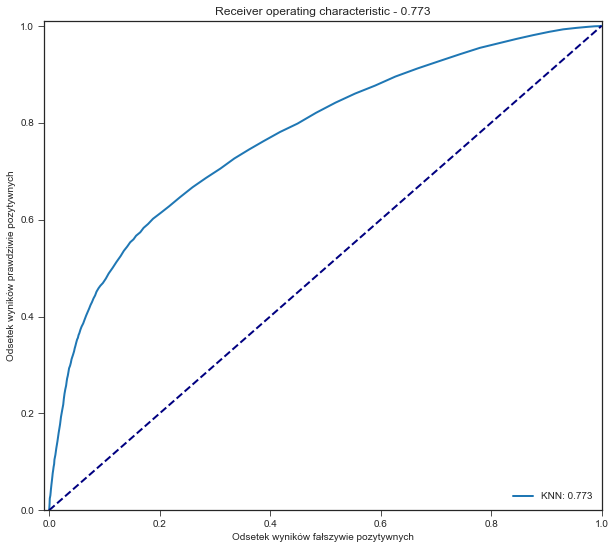

In [45]:
wynikiWYKRES= []
true = (dane[objasniana]=="yes").astype(int).sort_index()
for wynik in [modelkNN]:
    # Wektor predykcji na podstawie serii pandas, posortowany wedle indeksów
    pred = pd.Series(sum(wynik["predykcje"], []), index=sum(wynik["indeksy"], [])).sort_index()
    wynikiWYKRES.append((true, pred, wynik["nazwa"]))
    
# Wywołujemy funkcję do rysowania
wykres_ROC(wynikiWYKRES)